In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import json

from sklearn.preprocessing import LabelEncoder


import seaborn as sn

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

In [2]:
from sklearn.model_selection import StratifiedKFold, train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [12]:
df=pd.read_csv('Tweets.csv')

In [13]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


In [10]:
df['tweet_created']=pd.to_datetime(df['tweet_created'])

In [14]:
df['time_stamp']=pd.to_datetime(df['tweet_created'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null datetime64[ns, pytz.FixedOffset(-480)]
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: datetime64[ns, pytz.FixedOffset(-480)](1), float64(

###  Часть 1. Описание набора данных и признаков

In [3]:
f_name=['target', 'id', 'data', 'query', 'user', 'description']

In [5]:
memes = pd.read_csv('testdata.csv', names=f_name) #, index_col="id")

In [6]:
memes.head()

,target,id,data,query,user,description
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...


In [7]:
memes.drop(columns="id", axis=1)

,target,data,query,user,description
0,4,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...
5,4,Mon May 11 03:22:00 UTC 2009,kindle2,GeorgeVHulme,@richardebaker no. it is too big. I'm quite ha...
6,0,Mon May 11 03:22:30 UTC 2009,aig,Seth937,Fuck this economy. I hate aig and their non lo...
7,4,Mon May 11 03:26:10 UTC 2009,jquery,dcostalis,Jquery is my new best friend.
8,4,Mon May 11 03:27:15 UTC 2009,twitter,PJ_King,Loves twitter
9,4,Mon May 11 03:29:20 UTC 2009,obama,mandanicole,how can you not love Obama? he makes jokes abo...


In [8]:
memes.shape

(498, 6)

In [9]:
memes.head()

,target,id,data,query,user,description
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...


In [10]:
memes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 6 columns):
target         498 non-null int64
id             498 non-null int64
data           498 non-null object
query          498 non-null object
user           498 non-null object
description    498 non-null object
dtypes: int64(2), object(4)
memory usage: 23.4+ KB


In [18]:
memes.tail(3)

,target,data,query,user,text
id,,,,,
14074,4,Sun Jun 14 04:36:34 UTC 2009,latex,iamtheonlyjosie,Ahhh... back in a *real* text editing environm...
14075,0,Sun Jun 14 21:36:07 UTC 2009,iran,plutopup7,"Trouble in Iran, I see. Hmm. Iran. Iran so far..."
14076,0,Sun Jun 14 21:36:17 UTC 2009,iran,captain_pete,Reading the tweets coming out of Iran... The w...


# Время добавления

Так как в нашем распоряжении есть чудесная переменная `added`, то можно поиграться с ней, преобразовав в понятный питону формат и повытаскивая из него час, день недели и месяца, месяц и год добавления

In [11]:
memes['Timestamp'] = pd.to_datetime(memes['data'])

In [12]:
memes['Year'] = memes.Timestamp.apply(lambda x: x.year)
memes['Month'] = memes.Timestamp.apply(lambda x: x.month)
memes['Day'] = memes.Timestamp.apply(lambda x: x.day)
memes['Hour'] = memes.Timestamp.apply(lambda x: x.hour)
memes['Weekday'] = memes.Timestamp.apply(lambda x: x.weekday())

In [13]:
memes.head()

,target,id,data,query,user,description,Timestamp,Year,Month,Day,Hour,Weekday
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...,2009-05-11 03:17:40+00:00,2009,5,11,3,0
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...,2009-05-11 03:18:03+00:00,2009,5,11,3,0
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck...",2009-05-11 03:18:54+00:00,2009,5,11,3,0
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...,2009-05-11 03:19:04+00:00,2009,5,11,3,0
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...,2009-05-11 03:21:41+00:00,2009,5,11,3,0


Также пригодится переменная, отвечающая за число дней, прошедших с момента добавления мема на сайт

In [14]:
memes['days_from_creation'] = (memes.Timestamp.max() - memes.Timestamp)/np.timedelta64(1, 'D')

А теперь для наших созданных переменных построим несколько гистограмм

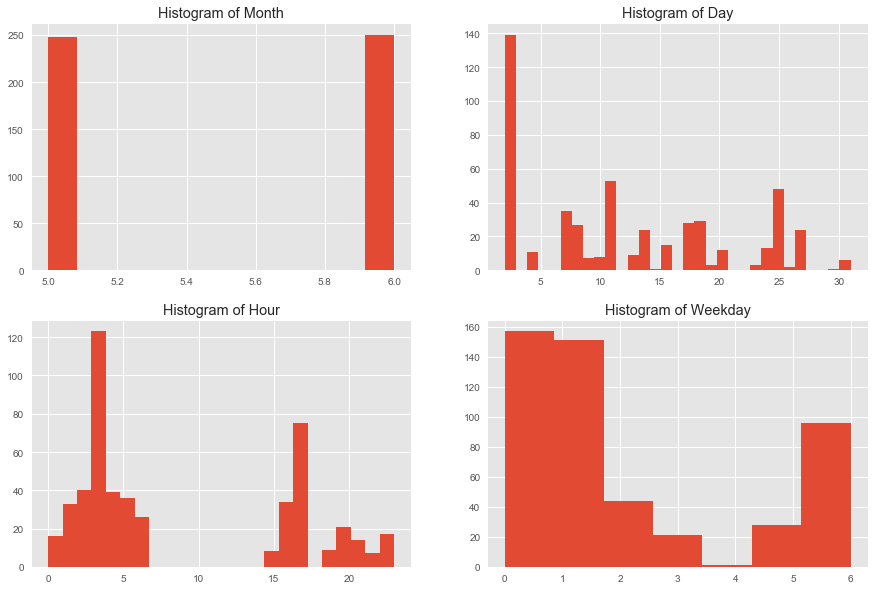

In [15]:
index =0 
f, axarr = plt.subplots(2, 2, figsize=(15,10))
times = ['Month', 'Day', 'Hour', 'Weekday']
bins = [12, 31, 24, 7]
index = 0
for i in range(2):
    for j in range(2):
        axarr[i, j].hist(memes[times[index]], bins = bins[index])
        axarr[i, j].set_title('Histogram of {}'.format(times[index]))
        index += 1

f.subplots_adjust(hspace=0.2)

Итак, что тут есть интересного:
- День ничего необычного не принес, распределено достаточно равномерно
- Гистограмма часа достаточно показательная - в ночной период активность значительно снижается, а затем растет, достигая пика примерно после окончания уроков у основной аудитории
- По дням недели есть заметное снижения на выходных, интересно, почему бы это

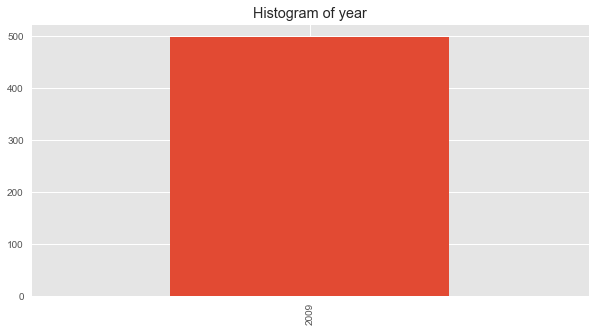

In [24]:
memes.Year.value_counts().plot(kind='bar', figsize=(10, 5))
plt.title("Histogram of year")
plt.show()

In [16]:
memes.Year.value_counts(normalize=True).apply(lambda x: "{:.2f}%".format(x*100))

2019    27.41%
2018    15.93%
2017    11.70%
2016     9.77%
2015     7.66%
2014     6.92%
2011     5.37%
2012     5.33%
2010     4.97%
2013     4.33%
2009     0.62%
Name: Year, dtype: object

(array([177.,   0.,   0.,   0.,   0., 139.,   0.,   0.,   0., 182.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

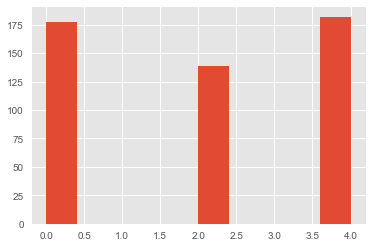

In [25]:
plt.hist(memes.target)
#plt.title("Hist of log average views");

# ML

In [16]:
import nltk
from nltk.corpus import stopwords

In [17]:
stop = stopwords.words('english')
stemmer = nltk.stem.snowball.EnglishStemmer('english')

def data_Stemmer(text):
    return ' '.join([stemmer.stem(word) for word in text.split(' ') if word not in stop])

In [39]:
"""
memes["description"] = memes.tags.fillna("")+' '+\
                       memes.about.fillna("")+' '+\
                       memes.origin.fillna("")+' '+\
                       memes.other_text.fillna("")
                       """

In [31]:
memes.description = memes.description.apply(lambda x: x.lower().replace('unknown', ''))

In [33]:
memes.description[4]

'reading my kindle2...  love it... lee childs is good read.'

In [34]:
data_Stemmer(memes.description[4])

'read kindle2...  love it... lee child good read.'

In [18]:
memes.description = memes.description.apply(lambda x: data_Stemmer(x))

In [19]:
X = memes.description
y = memes.target

Для TF-IDF попробуем использовать биграммы, а чтобы словарь не раздувался до неадекватных размеров, ограничим минимальную частоты содержания слов в документах 0.1%. То есть будем выкидывать такие слова и биграммы, которые встречаются реже, чем в 0.1% документов. 

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vectorizer = TfidfVectorizer(stop_words=stop, ngram_range=(1, 2), min_df=0.001, norm=None)

In [24]:
Xtr, Xval, ytr, yval = train_test_split(X, y, test_size=0.30, random_state=42)

In [25]:
Xtr_tfidf = tf_vectorizer.fit_transform(Xtr)
Xval_tfidf = tf_vectorizer.transform(Xval)
Xtr_tfidf.shape, Xval_tfidf.shape

((348, 4158), (150, 4158))

Целевую переменную (среднее число просмотров в день), разделим на пять групп по квантилям, одновременно получая наивный baseline - если мы всем объектам примишем один класс, то итоговая точность составит 1/5 = 20%. Еще один плюс подхода - дисбаланса классов у нас точно не будет :)

In [78]:
#ytr_quantile = pd.qcut(ytr, q=5)

In [79]:
#ytr_quantile.value_counts()

Для будущих нужд запомним имеющиеся интервалы

In [80]:
#intervals = ytr_quantile.unique().categories.get_values()

In [81]:
#intervals

Так как на тестовой выборке мы аналогичное преобразование с квантильным разбиением выполнить не можем (группы не будут совпадать), запишем функцию для преобразования тестовых значений 

In [82]:
"""
def quantile(y):
    for interval in intervals:
        if y<=interval.right:
            return interval
            break
    return interval
    """

'\ndef quantile(y):\n    for interval in intervals:\n        if y<=interval.right:\n            return interval\n            break\n    return interval\n    '

In [83]:
#yval_quantile = yval.apply(quantile)

In [84]:
#yval_quantile.value_counts()

Наконец, для обучения закодируем интервалы при помощи `LabelEncoder()`

In [85]:
#le = LabelEncoder()

In [86]:
#ytr_quantile = le.fit_transform(ytr_quantile)
#yval_quantile = le.transform(yval_quantile)

In [87]:
#ytr_quantile

In [88]:
#le.inverse_transform(ytr_quantile)

In [21]:
from sklearn.linear_model import SGDClassifier, LogisticRegressionCV

In [22]:
logit_sgd = SGDClassifier(
    loss='log', 
    shuffle=True, 
    n_iter_no_change=10, 
    max_iter=500, 
    penalty='l2', 
    random_state=42
)

In [26]:
logit_sgd.fit(Xtr_tfidf, ytr)

print(accuracy_score(logit_sgd.predict(Xtr_tfidf), ytr))
print(accuracy_score(logit_sgd.predict(Xval_tfidf), yval))

print(classification_report(logit_sgd.predict(Xval_tfidf), yval))

1.0
0.5933333333333334
              precision    recall  f1-score   support

           0       0.63      0.54      0.58        50
           2       0.48      0.64      0.55        36
           4       0.66      0.61      0.63        64

    accuracy                           0.59       150
   macro avg       0.59      0.60      0.59       150
weighted avg       0.61      0.59      0.60       150



In [27]:
logit_cv = LogisticRegressionCV(Cs=10, n_jobs=-1)
logit_cv.fit(Xtr_tfidf, ytr)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                     random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [28]:
print(accuracy_score(logit_cv.predict(Xtr_tfidf), ytr))
print(accuracy_score(logit_cv.predict(Xval_tfidf), yval))

print(classification_report(logit_cv.predict(Xval_tfidf), yval))

1.0
0.6466666666666666
              precision    recall  f1-score   support

           0       0.72      0.62      0.67        50
           2       0.54      0.74      0.63        35
           4       0.68      0.62      0.65        65

    accuracy                           0.65       150
   macro avg       0.65      0.66      0.65       150
weighted avg       0.66      0.65      0.65       150



In [29]:
def visualize_coefficients(coef, feature_names, title, plot_num, n_top_features=10):
    interesting_coefficients = np.argsort(coef)[-n_top_features:]
    
    plt.figure(figsize=(15, 15))
    plt.subplot(510+plot_num+1)
    colors = ["lightblue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + n_top_features), 
               feature_names[interesting_coefficients], rotation=60, ha="right", fontsize=14);
    plt.title(title)

In [30]:
logit_sgd.coef_

array([[-3.41711627e-024, -3.41711627e-024, -1.04955284e+001, ...,
        -9.33274497e-107, -1.72151001e-031, -1.72151001e-031],
       [ 1.04955284e+001,  1.04955284e+001,  1.04955284e+001, ...,
         7.86614668e-110, -2.77676810e-047, -2.77676810e-047],
       [-3.40734375e+000, -3.40734375e+000, -8.91095407e+000, ...,
        -2.19199802e-088,  1.06563669e-041,  1.06563669e-041]])

На графиках отображены по топ-25 слов, которые (по мнению логистической регресии), наиболее сильно увеличивают вероятность попадания в соответствующий класс популярности

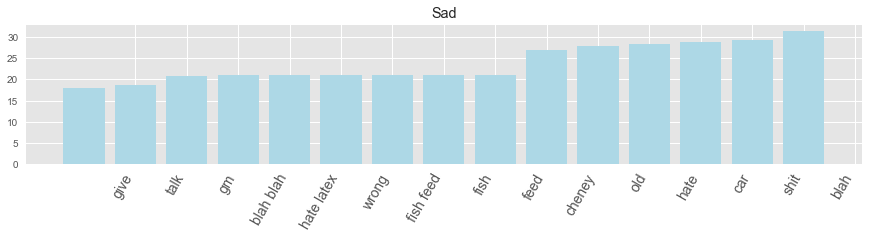

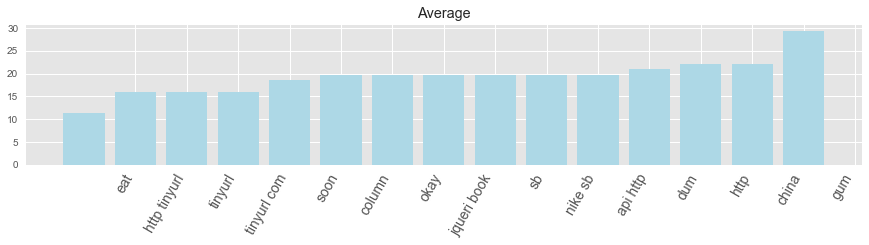

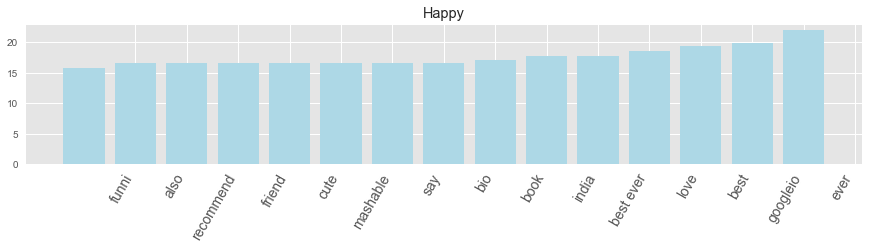

In [31]:
#titles = ["Very sad", "Sad",  'Average','Happy', 'Very happy']
titles = ["Sad",  'Average','Happy']
#"Unpopular",
# 'Popular', 
for i in range(3):
    visualize_coefficients(logit_sgd.coef_[i,:], tf_vectorizer.get_feature_names(), 
                      title=titles[i], 
                           plot_num=i, n_top_features=15)
                          

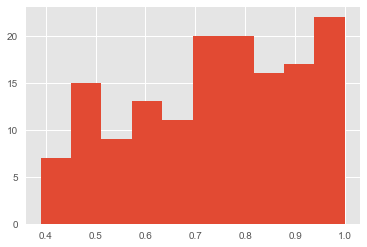

In [32]:
plt.hist(np.max(logit_cv.predict_proba(Xval_tfidf), axis=1));

In [33]:
predictions = logit_sgd.predict(Xval_tfidf)
certainty_mask = np.max(logit_sgd.predict_proba(Xval_tfidf), axis=1)>0.6

In [ ]:
'''
meme_slice = memes.loc[Xval.index[certainty_mask]]
meme_slice['actual_popularity'] = le.inverse_transform(predictions[certainty_mask])
'''

In [ ]:
'''
meme_slice[
    ['name', 'origin_year', 'date_added', 'views', 'description', 'average_views', 'actual_popularity']
].sort_values(by='views', ascending=False)'''

### А теперь можно взглянуть на confusion matrix и посмотреть, где же косячат модели

In [ ]:
def plot_confusion(predictions, yval, title):
    array = confusion_matrix(yval, predictions)
    df_cm = pd.DataFrame(array, index = [i for i in titles],
                      columns = [i for i in titles])
    plt.figure(figsize = (7,7))
    sn.heatmap(df_cm, annot=True, fmt='g', cbar=False)
    plt.title(title);

In [ ]:
plot_confusion(logit_sgd.predict(Xval_tfidf), yval, "Logit regression")

In [ ]:
plot_confusion(logit_cv.predict(Xval_tfidf), yval_quantile, "Logit regression")

In [114]:
y.unique()

array([4, 0, 2], dtype=int64)